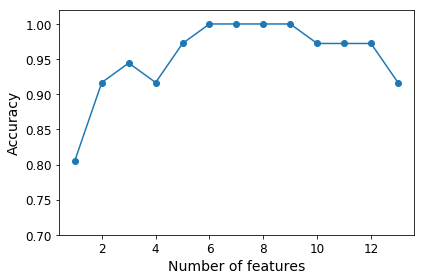

In [80]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

As we can see in the following figure, the accuracy of the KNN classifier improved on
the validation dataset as we reduced the number of features, which is likely due to a
decrease in the curse of dimensionality that we discussed in the context of the KNN
algorithm previously, A Tour of Machine Learning Classifiers Using scikit-learn. Also,
we can see in the following plot that the classifier achieved 100 percent accuracy for
k={3, 7, 8, 9, 10, 11, 12}:

In [81]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['malic_acid', 'alcalinity_of_ash', 'nonflavanoid_phenols'], dtype='object')


In [82]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.985915492958
Test accuracy: 0.944444444444


In [83]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.957746478873
Test accuracy: 0.944444444444


<br>
<br>
<img src="attachment:image.png" alt="Drawing" style="width: =500px;"/>

# Assessing feature importance with Random Forests

 1) color_intensity                0.164503
 2) flavanoids                     0.162665
 3) proline                        0.152335
 4) od280/od315_of_diluted_wines   0.142162
 5) alcohol                        0.116726
 6) hue                            0.068542
 7) total_phenols                  0.051192
 8) alcalinity_of_ash              0.040230
 9) malic_acid                     0.028128
10) magnesium                      0.025703
11) proanthocyanins                0.020574
12) ash                            0.016314
13) nonflavanoid_phenols           0.010925


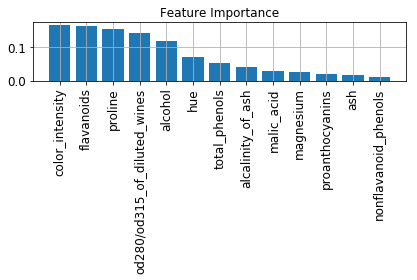

In [84]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [85]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])

Number of samples that meet this criterion: 142


Now, let's print the features that met the threshold criterion for feature selection that we set earlier (note that this code snippet does not appear in the actual book but was added to this notebook later for illustrative purposes):

In [86]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) color_intensity                0.164503
 2) flavanoids                     0.162665
 3) proline                        0.152335
 4) od280/od315_of_diluted_wines   0.142162
 5) alcohol                        0.116726


<br>
<br>